# IMPORT LIBRARIES  




In [910]:
import numpy as np 
import pandas as pd                                                     
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# DATA VISUALIZATION 

In [911]:
dt = pd.read_csv("CaseStudyData.csv")
dt.head()

,TargetVariable,Variable1,Variable2,Variable3,Variable4,Variable5,Variable6,Variable7,Variable8,Variable9
0,1,2.357542,29.0,2,10.50,green,4.606326,0,square,0
1,1,2.000362,50.0,2,10.50,green,10.824921,0,round,0
2,0,2.000029,34.0,3,69.55,green,5.861325,8,square,2
3,1,2.020183,50.0,2,10.50,green,10.896444,0,triangle,0
4,0,2.952665,45.0,1,35.50,blue,9.159679,0,triangle,0


In [912]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TargetVariable  600 non-null    int64  
 1   Variable1       600 non-null    float64
 2   Variable2       600 non-null    float64
 3   Variable3       600 non-null    int64  
 4   Variable4       600 non-null    object 
 5   Variable5       600 non-null    object 
 6   Variable6       600 non-null    float64
 7   Variable7       600 non-null    int64  
 8   Variable8       600 non-null    object 
 9   Variable9       600 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 47.0+ KB


In [913]:
dt.describe()

,TargetVariable,Variable1,Variable2,Variable3,Variable6,Variable7,Variable9
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.393333,2.259727,30.668333,2.308333,6.048527,0.538333,0.375000
std,0.488897,0.293474,13.030166,0.835320,3.474091,1.097210,0.773761
min,0.000000,2.000000,0.750000,1.000000,0.045560,0.000000,0.000000
25%,0.000000,2.017352,22.000000,2.000000,2.965291,0.000000,0.000000
50%,0.000000,2.132713,33.000000,3.000000,6.023347,0.000000,0.000000
75%,1.000000,2.453479,35.000000,3.000000,9.062918,1.000000,0.000000
max,1.000000,2.998510,71.000000,3.000000,11.955890,8.000000,5.000000


In [914]:
dt.isnull().sum()

TargetVariable    0
Variable1         0
Variable2         0
Variable3         0
Variable4         0
Variable5         0
Variable6         0
Variable7         0
Variable8         0
Variable9         0
dtype: int64

In [915]:
dt.shape

(600, 10)

<Axes: xlabel='TargetVariable', ylabel='Count'>

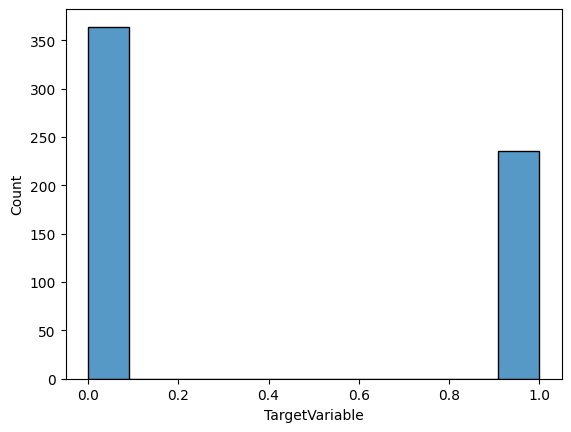

In [916]:
sns.histplot(dt["TargetVariable"])

<Axes: xlabel='Variable1', ylabel='Density'>

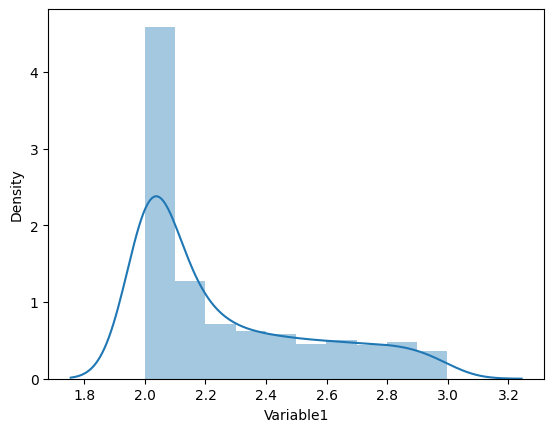

In [917]:
sns.distplot(dt["Variable1"])

<Axes: xlabel='Variable2', ylabel='Density'>

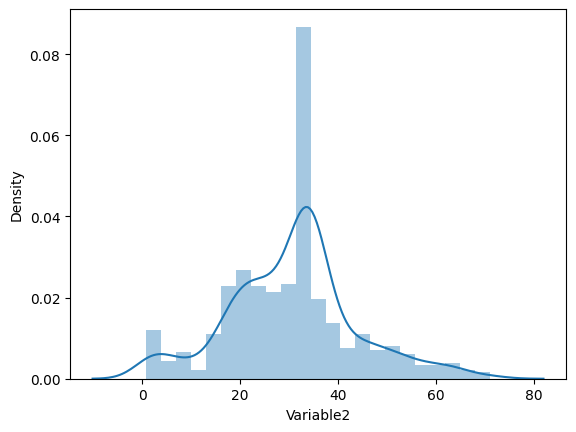

In [918]:
sns.distplot(dt["Variable2"])

<Axes: xlabel='Variable3', ylabel='Density'>

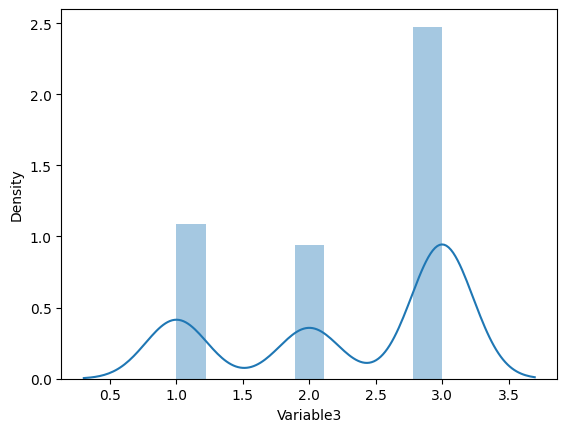

In [919]:
sns.distplot(dt["Variable3"])

<Axes: xlabel='Variable4', ylabel='Count'>

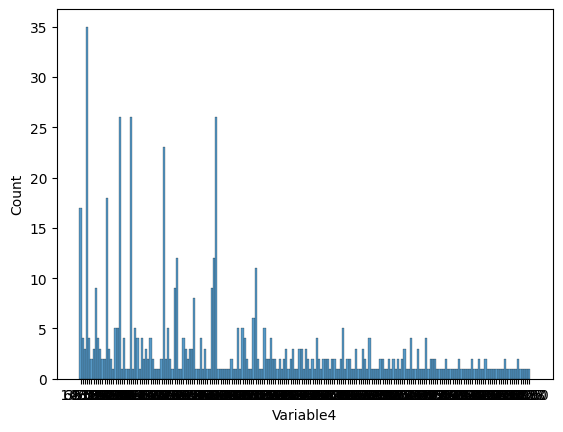

In [920]:
sns.histplot(dt["Variable4"])

<Axes: xlabel='Variable5', ylabel='Count'>

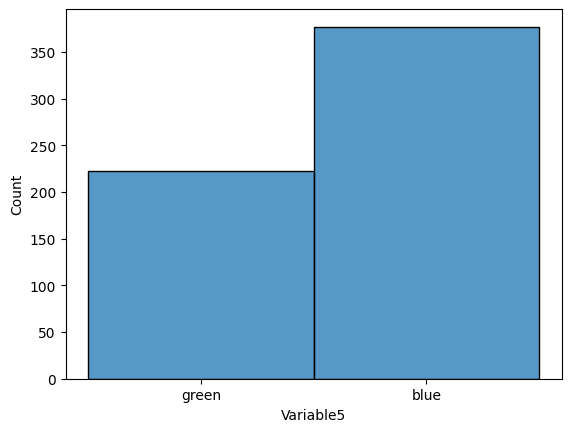

In [921]:
sns.histplot(dt["Variable5"])

<Axes: xlabel='Variable6', ylabel='Count'>

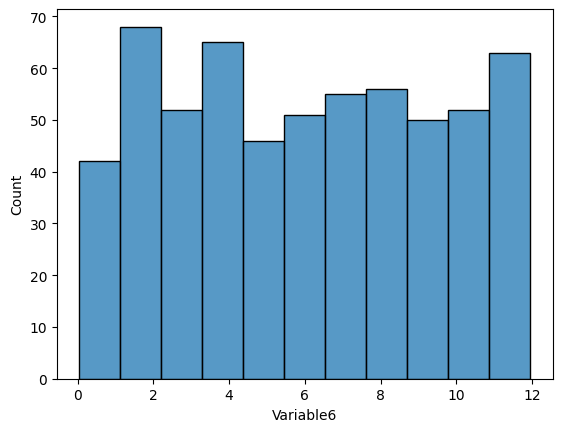

In [922]:
sns.histplot(dt["Variable6"])

<Axes: xlabel='Variable7', ylabel='Density'>

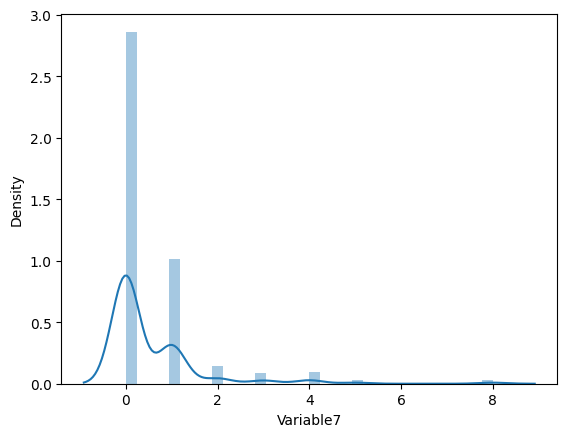

In [923]:
sns.distplot(dt["Variable7"])

<Axes: xlabel='Variable8', ylabel='Count'>

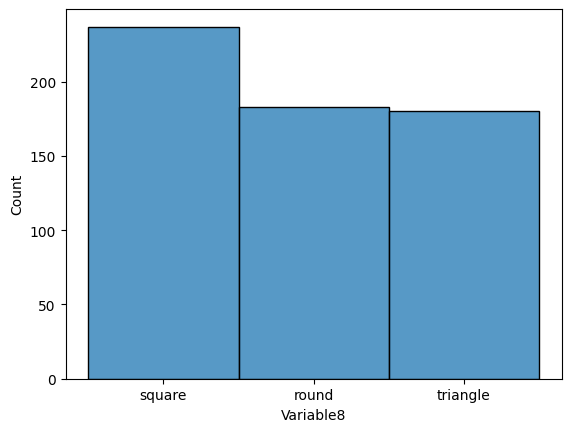

In [924]:
sns.histplot(dt["Variable8"])

<Axes: xlabel='Variable9', ylabel='Count'>

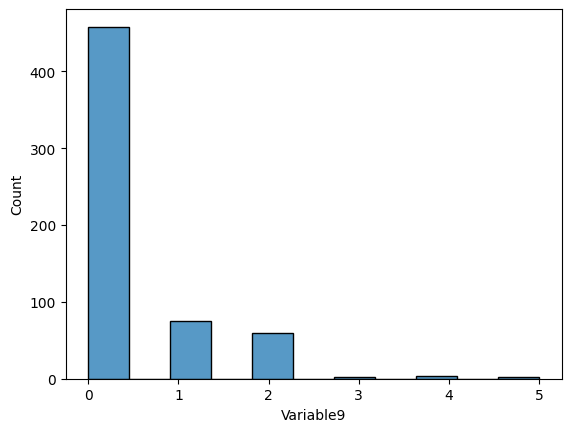

In [925]:
sns.histplot(dt["Variable9"])

# FEATURE ENGINEERING 

In [926]:
#label encoding ()

from sklearn.preprocessing import LabelEncoder
cols = ["Variable4","Variable5","Variable8"]
le = LabelEncoder()
for col in cols:
    dt[col] = le.fit_transform(dt[col])

In [927]:
dt.head()

,TargetVariable,Variable1,Variable2,Variable3,Variable4,Variable5,Variable6,Variable7,Variable8,Variable9
0,1,2.357542,29.0,2,2,1,4.606326,0,1,0
1,1,2.000362,50.0,2,2,1,10.824921,0,0,0
2,0,2.000029,34.0,3,143,1,5.861325,8,1,2
3,1,2.020183,50.0,2,2,1,10.896444,0,2,0
4,0,2.952665,45.0,1,106,0,9.159679,0,2,0


<Axes: >

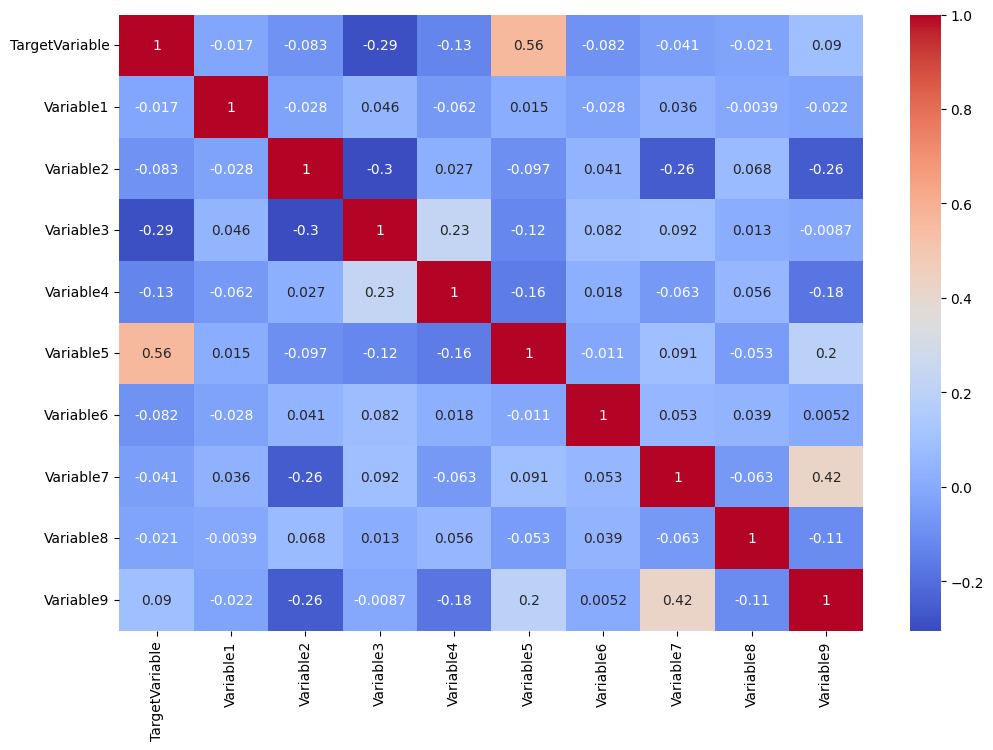

In [928]:
corr = dt.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True, cmap="coolwarm")

# FEATURE ELIMINATION 

In [949]:
# drop variable 6 and and variable 8 

dt = dt.drop(columns=[ 'Variable6', 'Variable8'], axis=1)

# MODEL SELECTION & EVALUATION

**TRAIN, TEST, SPLIT**

In [950]:
X = dt.drop(columns=['TargetVariable'], axis=1)
y = dt['TargetVariable']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

**MODEL AND CROSS VALIDATION FUNCTION**

In [951]:

from sklearn.model_selection import cross_val_score
def classify(model, X, y):
    model.fit(X_train, y_train)
    print("Train Accuracy is", model.score(X_train, y_train)*100)
    print("Test Accuracy is", model.score(X_test, y_test)*100)
    score = cross_val_score(model, X, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

**CONFUSION MATRIX, ACCURACY, PRECISION, RECALL, F1-SCORE, ROC_CURVE, ROC_AUC_SCORE**

In [952]:
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_curve, roc_auc_score)

def evaluate_model(y_test, y_pred):
    #evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Print the confusion matrix and evaluation metrics
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1)
    print('ROC AUC Score:', roc_auc)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


**HYPERPARAMER TUNING FUNCTION (GRIDSEARCH)**

In [953]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

def hyperparameter_tuning(model_name, X_train, X_test, y_train, y_test):
    # Define the model and hyperparameters to tune based on the model name
    if model_name == 'LogisticRegression':
        model = LogisticRegression()
        param_grid = {
            'penalty': ['l1', 'l2'],
            'C': [0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs', 'sag', 'saga']
        }
    elif model_name == 'DecisionTree':
        model = DecisionTreeClassifier()
        param_grid = {
            'criterion': ['gini', 'entropy'],
            'max_depth': [2, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    elif model_name == 'RandomForest':
        model = RandomForestClassifier()
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [2, 4, 6],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        }
    elif model_name == 'SVM':
        model = SVC()
        param_grid = {
            'C': [0.1, 1, 10],
            'kernel': ['linear'],
            'gamma': ['scale', 'auto']
        }
    elif model_name == 'XGBoost':
        model = xgb.XGBClassifier()
        param_grid = {
            'learning_rate': [0.1, 0.01, 0.001],
            'n_estimators': [100, 200, 500],
            'max_depth': [2, 5, 10, 20],
            'subsample': [0.5, 0.7, 1.0],
            'colsample_bytree': [0.5, 0.7, 1.0]
        }

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_

    # Evaluate the best model on the test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Return the results as a dictionary
    results = {'best_params': best_params, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}
    return results


# LOGISTIC REGRESSION MODEL 

In [954]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
model = LogisticRegression()
classify(model, X, y)

y_pred = model.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred)


#store accuracy and cv score value
train_accuracy1 = model.score(X_train, y_train) * 100
test_accuracy1 = model.score(X_test, y_test) * 100
score = cross_val_score(model, X, y, cv=5)
cv_score1 = np.mean(score) * 100



Train Accuracy is 79.01960784313725
Test Accuracy is 84.44444444444444
Cross validation is 79.5


<Axes: >

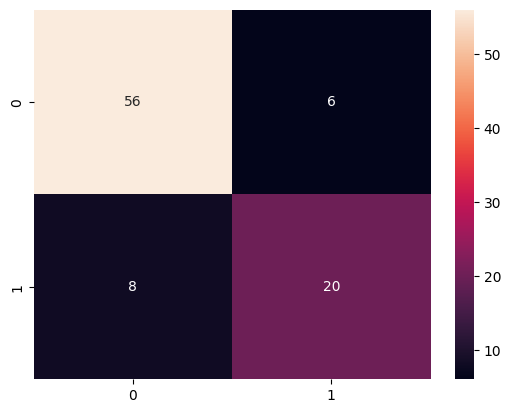

In [955]:
sns.heatmap(cm1, annot=True)

**LOGISTIC REGRESSION EVALUATION**

Accuracy: 0.8444444444444444
Precision: 0.7692307692307693
Recall: 0.7142857142857143
F1 Score: 0.7407407407407408
ROC AUC Score: 0.8087557603686637


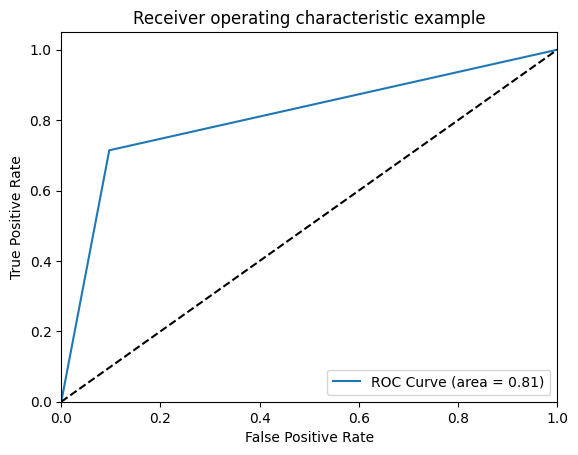

In [956]:

evaluate_model(y_test, y_pred)


accuracy_1 = accuracy_score(y_test, y_pred)
precision_1 = precision_score(y_test, y_pred)
recall_1 = recall_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred)
roc_auc1 = roc_auc_score(y_test, y_pred)

**LOGISTIC REGRESSION HYPERPARAMETER TUNING**

In [493]:
hyperparameter_tuning('LogisticRegression', X_train, X_test, y_train, y_test)


{'best_params': {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'},
 'accuracy': 0.8444444444444444,
 'precision': 0.7692307692307693,
 'recall': 0.7142857142857143,
 'f1': 0.7407407407407408}

**LOGISTIC REGRESSION COSTING**

In [957]:
num_inc_false_positive = cm1[0, 1]*1000
print('Cost to company for Flase Positives is R',num_inc_false_positive)

num_inc_false_negative = cm1[1, 0]*80000
print('Cost to company for Flase Negatives is R',num_inc_false_negative)
LC = num_inc_false_positive+num_inc_false_negative
print('Total cost to company is :R',LC)


Cost to company for Flase Positives is R 6000
Cost to company for Flase Negatives is R 640000
Total cost to company is :R 646000


# DECISION TREE MODEL

In [960]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
model = DecisionTreeClassifier()
classify(model, X, y)

y_pred = model.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred)
cm2

train_accuracy2 = model.score(X_train, y_train) * 100
test_accuracy2 = model.score(X_test, y_test) * 100
score = cross_val_score(model, X, y, cv=5)
cv_score2 = np.mean(score) * 100

Train Accuracy is 100.0
Test Accuracy is 84.44444444444444
Cross validation is 72.66666666666669


<Axes: >

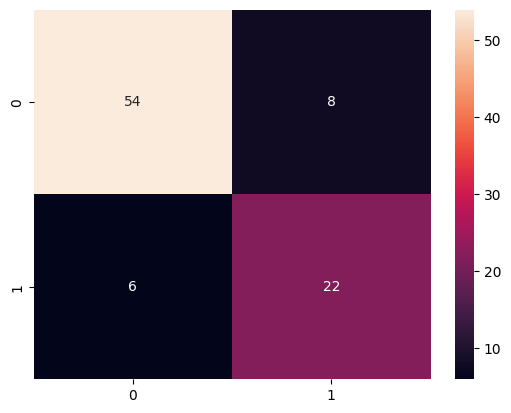

In [961]:
sns.heatmap(cm2, annot=True)

**DECISION TREE MODEL EVALUATION**

Accuracy: 0.8444444444444444
Precision: 0.7333333333333333
Recall: 0.7857142857142857
F1 Score: 0.7586206896551724
ROC AUC Score: 0.8283410138248848


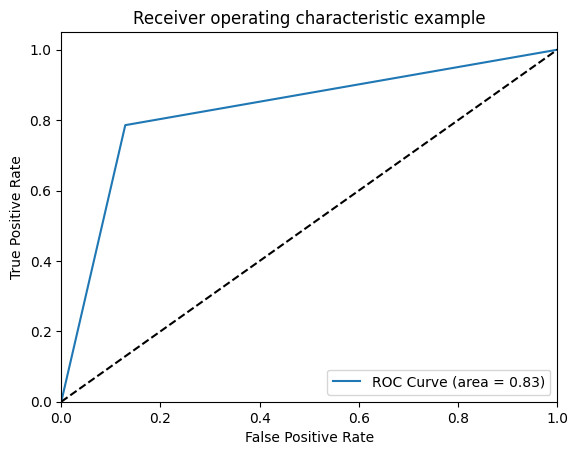

In [962]:
evaluate_model(y_test, y_pred)

# Calculate confusion matrix and evaluation metrics

accuracy_2 = accuracy_score(y_test, y_pred)
precision_2 = precision_score(y_test, y_pred)
recall_2 = recall_score(y_test, y_pred)
f1_2 = f1_score(y_test, y_pred)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred)
roc_auc2 = roc_auc_score(y_test, y_pred)

**DECISION TREE HYPERPARAMETER TUNING** 

In [47]:
hyperparameter_tuning('DecisionTree', X_train, X_test, y_train, y_test)

{'best_params': {'criterion': 'entropy',
  'max_depth': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 5},
 'accuracy': 0.8333333333333334,
 'precision': 0.7441860465116279,
 'recall': 0.7804878048780488,
 'f1': 0.761904761904762}

**DECISION TREE COSTING**

In [963]:
num_inc_false_positive = cm2[0, 1]*1000
print('Cost to company for Flase Positives is R',num_inc_false_positive)

num_inc_false_negative = cm2[1, 0]*80000
print('Cost to company for Flase Negatives is R',num_inc_false_negative)
DC = num_inc_false_positive+num_inc_false_negative
print('Total cost to company is :R', DC)


Cost to company for Flase Positives is R 8000
Cost to company for Flase Negatives is R 480000
Total cost to company is :R 488000


# RANDOM FOREST MODEL

In [976]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
model = RandomForestClassifier()
classify(model, X, y)


y_pred = model.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred)


train_accuracy3 = model.score(X_train, y_train) * 100
test_accuracy3 = model.score(X_test, y_test) * 100
score = cross_val_score(model, X, y, cv=5)
cv_score3 = np.mean(score) * 100

Train Accuracy is 100.0
Test Accuracy is 87.77777777777777
Cross validation is 82.0


<Axes: >

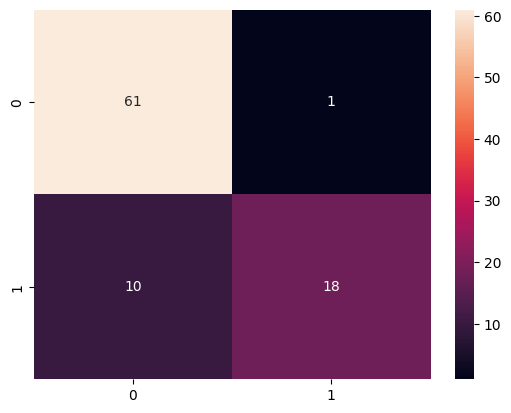

In [977]:
sns.heatmap(cm3, annot=True)

**RANDOM FORREST EVALUATION**

Accuracy: 0.8777777777777778
Precision: 0.9473684210526315
Recall: 0.6428571428571429
F1 Score: 0.7659574468085106
ROC AUC Score: 0.8133640552995391


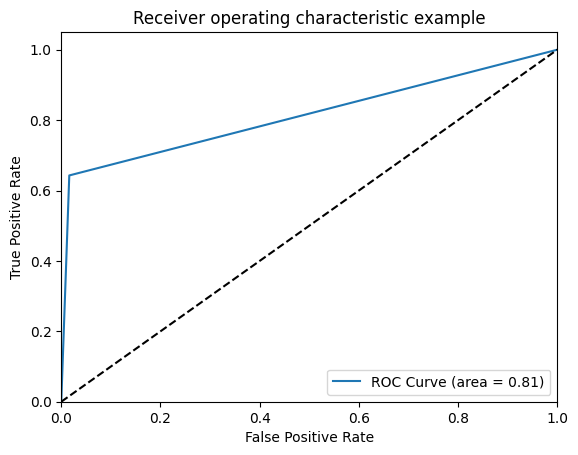

In [978]:
evaluate_model(y_test, y_pred)

# Calculate confusion matrix and evaluation metrics

accuracy_3 = accuracy_score(y_test, y_pred)
precision_3 = precision_score(y_test, y_pred)
recall_3 = recall_score(y_test, y_pred)
f1_3 = f1_score(y_test, y_pred)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred)
roc_auc3 = roc_auc_score(y_test, y_pred)

In [60]:
hyperparameter_tuning('RandomForest', X_train, X_test, y_train, y_test)

{'best_params': {'bootstrap': False,
  'max_depth': 4,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 'accuracy': 0.8333333333333334,
 'precision': 0.7692307692307693,
 'recall': 0.7317073170731707,
 'f1': 0.7499999999999999}

**RANDOM FOREST COSTING**

In [979]:
num_inc_false_positive = cm3[0, 1]*1000
print('Cost to company for Flase Positives is R',num_inc_false_positive)

num_inc_false_negative = cm3[1, 0]*80000
print('Cost to company for Flase Negatives is R',num_inc_false_negative)
RC = num_inc_false_positive+num_inc_false_negative
print('Total cost to company is :R', RC)


Cost to company for Flase Positives is R 1000
Cost to company for Flase Negatives is R 800000
Total cost to company is :R 801000


# SUPPORT VECTOR MACHINE MODEL (SVM)

In [980]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
model = svm.SVC(kernel='linear')
classify(model, X, y)

y_pred = model.predict(X_test)
cm4 = confusion_matrix(y_test, y_pred)


train_accuracy4 = model.score(X_train, y_train) * 100
test_accuracy4 = model.score(X_test, y_test) * 100
score = cross_val_score(model, X, y, cv=5)
cv_score4 = np.mean(score) * 100

Train Accuracy is 78.23529411764706
Test Accuracy is 84.44444444444444
Cross validation is 79.16666666666667


<Axes: >

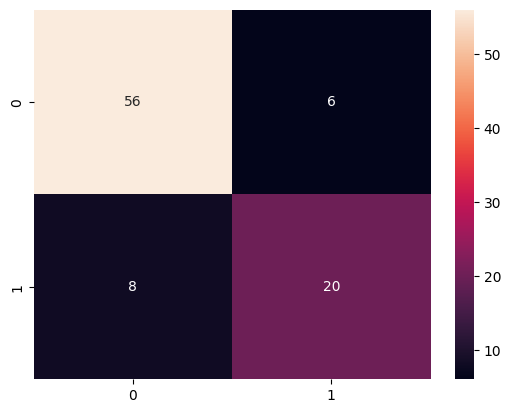

In [981]:
sns.heatmap(cm4, annot=True)

**SUPORT VECTOR MACHINE MODEL EVALUATION** 

Accuracy: 0.8444444444444444
Precision: 0.7692307692307693
Recall: 0.7142857142857143
F1 Score: 0.7407407407407408
ROC AUC Score: 0.8087557603686637


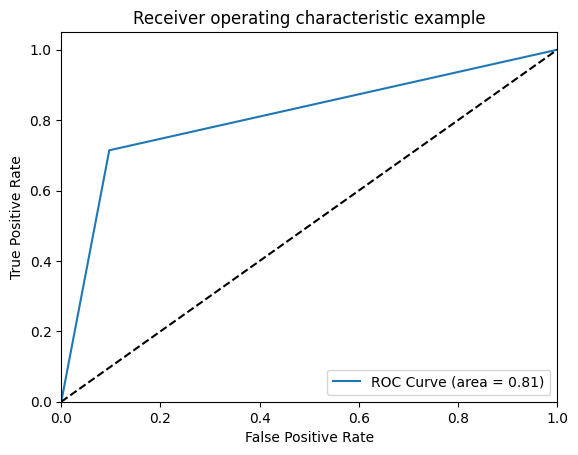

In [982]:
evaluate_model(y_test, y_pred)

# Calculate confusion matrix and evaluation metrics

accuracy_4 = accuracy_score(y_test, y_pred)
precision_4 = precision_score(y_test, y_pred)
recall_4 = recall_score(y_test, y_pred)
f1_4 = f1_score(y_test, y_pred)
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred)
roc_auc4 = roc_auc_score(y_test, y_pred)

**SUPORT VECTOR MACHINE MODEL HYPERPARAMETER TUNING**

In [72]:
hyperparameter_tuning('SVM', X_train, X_test, y_train, y_test)

{'best_params': {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'},
 'accuracy': 0.8083333333333333,
 'precision': 0.6956521739130435,
 'recall': 0.7804878048780488,
 'f1': 0.7356321839080461}

**SUPORT VECTOR MACHINE MODEL COSTING**

In [983]:
num_inc_false_positive = cm4[0, 1]*1000
print('Cost to company for Flase Positives is R',num_inc_false_positive)

num_inc_false_negative = cm4[1, 0]*80000
print('Cost to company for Flase Negatives is R',num_inc_false_negative)
SC = num_inc_false_positive+num_inc_false_negative
print('Total cost to company is :R', SC)


Cost to company for Flase Positives is R 6000
Cost to company for Flase Negatives is R 640000
Total cost to company is :R 646000


# XGBOOST MODEL

In [984]:
import xgboost as xgb 
model = xgb.XGBClassifier(objective='binary:logistic')
classify(model, X, y)

y_pred = model.predict(X_test)
cm5 = confusion_matrix(y_test, y_pred)


train_accuracy5 = model.score(X_train, y_train) * 100
test_accuracy5 = model.score(X_test, y_test) * 100
score = cross_val_score(model, X, y, cv=5)
cv_score5 = np.mean(score) * 100

Train Accuracy is 100.0
Test Accuracy is 83.33333333333334
Cross validation is 78.99999999999999


<Axes: >

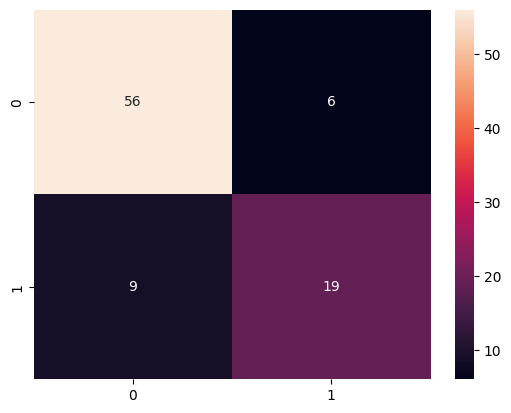

In [985]:
sns.heatmap(cm5, annot=True)

**XGBOOST MODEL EVALUATION**

Accuracy: 0.8333333333333334
Precision: 0.76
Recall: 0.6785714285714286
F1 Score: 0.7169811320754718
ROC AUC Score: 0.7908986175115207


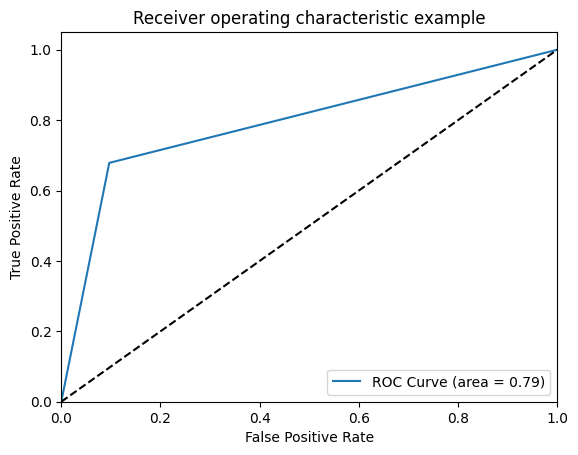

In [986]:
evaluate_model(y_test, y_pred)

# Calculate confusion matrix and evaluation metrics

accuracy_5 = accuracy_score(y_test, y_pred)
precision_5 = precision_score(y_test, y_pred)
recall_5 = recall_score(y_test, y_pred)
f1_5 = f1_score(y_test, y_pred)
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_pred)
roc_auc5 = roc_auc_score(y_test, y_pred)

**XGBOOST MODEL HYPERPARAMETER TUNING**

In [987]:
hyperparameter_tuning('XGBoost', X_train, X_test, y_train, y_test)

{'best_params': {'colsample_bytree': 0.5,
  'learning_rate': 0.01,
  'max_depth': 10,
  'n_estimators': 500,
  'subsample': 1.0},
 'accuracy': 0.8333333333333334,
 'precision': 0.8095238095238095,
 'recall': 0.6071428571428571,
 'f1': 0.6938775510204083}

**XGBOOST MODEL COSTING**

In [988]:
num_inc_false_positive = cm5[0, 1]*1000
print('Cost to company for Flase Positives is R',num_inc_false_positive)

num_inc_false_negative = cm5[1, 0]*80000
print('Cost to company for Flase Negatives is R',num_inc_false_negative)
XC = num_inc_false_positive+num_inc_false_negative
print('Total cost to company is :R', XC)


Cost to company for Flase Positives is R 6000
Cost to company for Flase Negatives is R 720000
Total cost to company is :R 726000


# MODEL COST ANALYSIS 

In [989]:
#TABLE SHOWING MODEL COSTS

from tabulate import tabulate
currency_symbol = "R"

table = [["LOGISTIC REGRESSION", f"{currency_symbol}{LC}"],
         ["DECISION TREE", f"{currency_symbol}{DC}"],
         ["RANDOM FOREST", f"{currency_symbol}{RC}"],
         ["SVM", f"{currency_symbol}{SC}"],
         ["XGBOOST", f"{currency_symbol}{XC}"]]

headers = ["MODEL", "COST"]

print(tabulate(table, headers=headers))

MODEL                COST
-------------------  -------
LOGISTIC REGRESSION  R646000
DECISION TREE        R488000
RANDOM FOREST        R801000
SVM                  R646000
XGBOOST              R726000


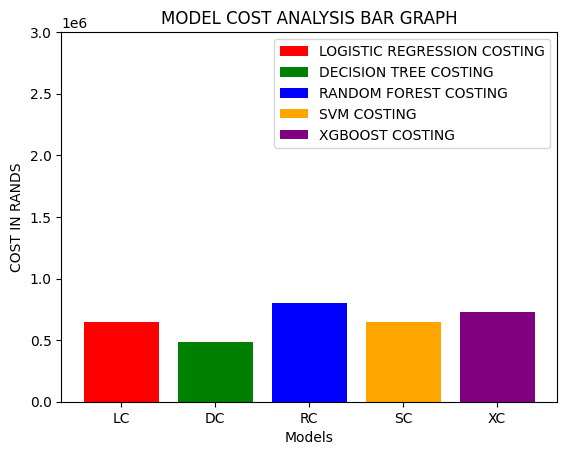

In [990]:

#BAR GRAPH COST COMPARISON 

costing_data = [LC, DC, RC, SC, XC]
x_labels = ['LC', 'DC', 'RC', 'SC', 'XC']

colors = ['red', 'green', 'blue', 'orange', 'purple']


# Create the bar chart
fig, ax = plt.subplots()
ax.bar(x_labels, costing_data, color=colors, label=['LOGISTIC REGRESSION COSTING', 'DECISION TREE COSTING ', 'RANDOM FOREST COSTING', 'SVM COSTING', 'XGBOOST COSTING'])


# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('COST IN RANDS')
ax.set_title('MODEL COST ANALYSIS BAR GRAPH')

# Add a legend
ax.legend()

ax.set_ylim([0, 3000000])

# Show the plot
plt.show()


# ACCURACY AND EVALUATION ANALYSIS 

In [995]:
#TABLE SHOWING MODEL COSTS

from tabulate import tabulate
percentage_symbol = "R"

table = [["LOGISTIC REGRESSION", f"{percentage_symbol}{test_accuracy1:.2f}", f"{percentage_symbol}{train_accuracy1:.2f}", f"{percentage_symbol}{cv_score1:.2f}"],
         ["DECISION TREE", f"{percentage_symbol}{test_accuracy2:.2f}", f"{percentage_symbol}{train_accuracy2:.2f}", f"{percentage_symbol}{cv_score2:.2f}"],
         ["RANDOM FOREST", f"{percentage_symbol}{test_accuracy3:.2f}", f"{percentage_symbol}{train_accuracy3:.2f}", f"{percentage_symbol}{cv_score3:.2f}"],
         ["SVM", f"{percentage_symbol}{test_accuracy4:.2f}", f"{percentage_symbol}{train_accuracy4:.2f}", f"{percentage_symbol}{cv_score4:.2f}"],
         ["XGBOOST", f"{percentage_symbol}{test_accuracy5:.2f}", f"{percentage_symbol}{train_accuracy5:.2f}", f"{percentage_symbol}{cv_score5:.2f}"]]

headers = ["MODEL", "TRAINING ACCURACY", "TESTING ACCURACY", "CROSS VALIDATION ACCURACY" ]

print(tabulate(table, headers=headers))


MODEL                TRAINING ACCURACY    TESTING ACCURACY    CROSS VALIDATION ACCURACY
-------------------  -------------------  ------------------  ---------------------------
LOGISTIC REGRESSION  R84.44               R79.02              R79.50
DECISION TREE        R84.44               R100.00             R72.33
RANDOM FOREST        R87.78               R100.00             R82.33
SVM                  R84.44               R78.24              R79.17
XGBOOST              R83.33               R100.00             R79.00


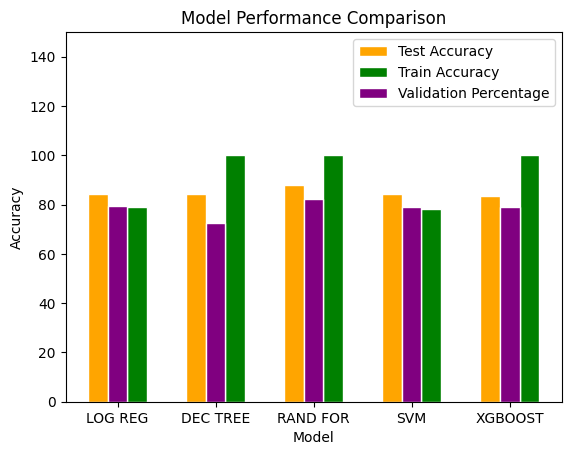

In [998]:
import matplotlib.pyplot as plt

# Data for the five models
models = ['LOG REG', 'DEC TREE', 'RAND FOR', 'SVM', 'XGBOOST']
test_accuracy = [test_accuracy1, test_accuracy2, test_accuracy3, test_accuracy4, test_accuracy5]
validation_percentage = [cv_score1, cv_score2, cv_score3, cv_score4, cv_score5]
train_accuracy = [train_accuracy1, train_accuracy2, train_accuracy3, train_accuracy4, train_accuracy5]

# Set the width of each bar
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = range(len(models))
r3 = [x + bar_width*2 for x in r1]
r2 = [x + bar_width for x in r1]

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(r1, test_accuracy, color='orange', width=bar_width, edgecolor='white', label='Test Accuracy')
ax.bar(r3, train_accuracy, color='green', width=bar_width, edgecolor='white', label='Train Accuracy')
ax.bar(r2, validation_percentage, color='purple', width=bar_width, edgecolor='white', label='Validation Percentage')

# Add x-axis ticks and labels
ax.set_xticks([r + bar_width for r in range(len(models))])
ax.set_xticklabels(models)

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison')

ax.set_ylim([0, 150])

# Add a legend
ax.legend()

# Show the plot
plt.show()



# F1- SCORES ANALYSIS FOR ALL MODELS

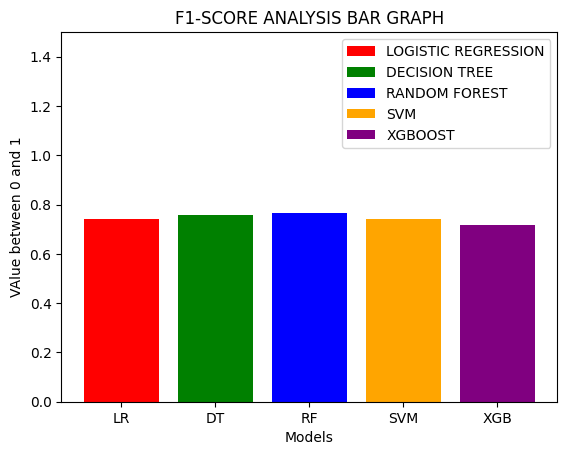

In [993]:
costing_data = [f1_1 , f1_2, f1_3, f1_4, f1_5]
x_labels = ['LR', 'DT', 'RF', 'SVM', 'XGB']

colors = ['red', 'green', 'blue', 'orange', 'purple']


# Create the bar chart
fig, ax = plt.subplots()
ax.bar(x_labels, costing_data, color=colors, label=['LOGISTIC REGRESSION', 'DECISION TREE', 'RANDOM FOREST', 'SVM', 'XGBOOST'])


# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('VAlue between 0 and 1')
ax.set_title('F1-SCORE ANALYSIS BAR GRAPH')

# Add a legend
ax.legend()

ax.set_ylim([0, 1.5])

# Show the plot
plt.show()


# ROC - AUC ANALYSIS FOR MODELS 

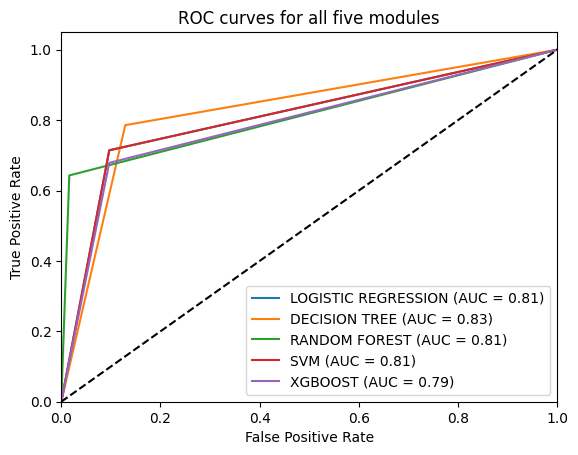

In [994]:
import matplotlib.pyplot as plt

# Plot the ROC curves for all five modules
plt.plot(fpr1, tpr1, label='LOGISTIC REGRESSION (AUC = {:.2f})'.format(roc_auc1))
plt.plot(fpr2, tpr2, label='DECISION TREE (AUC = {:.2f})'.format(roc_auc2))
plt.plot(fpr3, tpr3, label='RANDOM FOREST (AUC = {:.2f})'.format(roc_auc3))
plt.plot(fpr4, tpr4, label='SVM (AUC = {:.2f})'.format(roc_auc4))
plt.plot(fpr5, tpr5, label='XGBOOST (AUC = {:.2f})'.format(roc_auc5))

# Set the title and labels for the plot
plt.title('ROC curves for all five modules')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Add a legend to the plot
plt.legend(loc='lower right')

# Show the plot
plt.show()




   
